In [29]:
import pandas as pd
import numpy as np
import calendar
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df=pd.read_csv('/content/drive/MyDrive/course final idk lol lmao/dataset.csv')

## **table contents**
*    feature
*    84 chroma cens
*    chroma cqt 84
*    chroma stft 84
*    mfcc 140
*    rmse 7
*    spectral bandwidth 7
*     spectral centroid 7
*    spectral contrast 49
*    spectral rolloff 7
* tonnetz 42
* zcr 7
* genres

## **mapping genres to their correspoding titles**

In [4]:
df.head(2)

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,chroma_cens.36,chroma_cens.37,chroma_cens.38,chroma_cens.39,chroma_cens.40,chroma_cens.41,chroma_cens.42,chroma_cens.43,chroma_cens.44,chroma_cens.45,chroma_cens.46,chroma_cens.47,chroma_cens.48,chroma_cens.49,chroma_cens.50,chroma_cens.51,chroma_cens.52,chroma_cens.53,chroma_cens.54,chroma_cens.55,chroma_cens.56,chroma_cens.57,chroma_cens.58,chroma_cens.59,chroma_cens.60,chroma_cens.61,chroma_cens.62,chroma_cens.63,chroma_cens.64,chroma_cens.65,chroma_cens.66,chroma_cens.67,chroma_cens.68,chroma_cens.69,chroma_cens.70,chroma_cens.71,chroma_cens.72,chroma_cens.73,chroma_cens.74,chroma_cens.75,chroma_cens.76,chroma_cens.77,chroma_cens.78,chroma_cens.79,chroma_cens.80,chroma_cens.81,chroma_cens.82,chroma_cens.83,chroma_cqt,chroma_cqt.1,chroma_cqt.2,chroma_cqt.3,chroma_cqt.4,chroma_cqt.5,chroma_cqt.6,chroma_cqt.7,chroma_cqt.8,chroma_cqt.9,chroma_cqt.10,chroma_cqt.11,chroma_cqt.12,chroma_cqt.13,chroma_cqt.14,chroma_cqt.15,chroma_cqt.16,chroma_cqt.17,chroma_cqt.18,chroma_cqt.19,chroma_cqt.20,chroma_cqt.21,chroma_cqt.22,chroma_cqt.23,chroma_cqt.24,chroma_cqt.25,chroma_cqt.26,chroma_cqt.27,chroma_cqt.28,chroma_cqt.29,chroma_cqt.30,chroma_cqt.31,chroma_cqt.32,chroma_cqt.33,chroma_cqt.34,chroma_cqt.35,chroma_cqt.36,chroma_cqt.37,chroma_cqt.38,chroma_cqt.39,chroma_cqt.40,chroma_cqt.41,chroma_cqt.42,chroma_cqt.43,chroma_cqt.44,chroma_cqt.45,chroma_cqt.46,chroma_cqt.47,chroma_cqt.48,chroma_cqt.49,chroma_cqt.50,chroma_cqt.51,chroma_cqt.52,chroma_cqt.53,chroma_cqt.54,chroma_cqt.55,chroma_cqt.56,chroma_cqt.57,chroma_cqt.58,chroma_cqt.59,chroma_cqt.60,chroma_cqt.61,chroma_cqt.62,chroma_cqt.63,chroma_cqt.64,chroma_cqt.65,chroma_cqt.66,chroma_cqt.67,chroma_cqt.68,chroma_cqt.69,chroma_cqt.70,chroma_cqt.71,chroma_cqt.72,chroma_cqt.73,chroma_cqt.74,chroma_cqt.75,chroma_cqt.76,chroma_cqt.77,chroma_cqt.78,chroma_cqt.79,chroma_cqt.80,chroma_cqt.81,chroma_cqt.82,chroma_cqt.83,chroma_stft,chroma_stft.1,chroma_stft.2,chroma_stft.3,chroma_stft.4,chroma_stft.5,chroma_stft.6,chroma_stft.7,chroma_stft.8,chroma_stft.9,chroma_stft.10,chroma_stft.11,chroma_stft.12,chroma_stft.13,chroma_stft.14,chroma_stft.15,chroma_stft.16,chroma_stft.17,chroma_stft.18,chroma_stft.19,chroma_stft.20,chroma_stft.21,chroma_stft.22,chroma_stft.23,chroma_stft.24,chroma_stft.25,chroma_stft.26,chroma_stft.27,chroma_stft.28,chroma_stft.29,chroma_stft.30,chroma_stft.31,chroma_stft.32,chroma_stft.33,chroma_stft.34,chroma_stft.35,chroma_stft.36,chroma_stft.37,chroma_stft.38,chroma_stft.39,chroma_stft.40,chroma_stft.41,chroma_stft.42,chroma_stft.43,chroma_stft.44,chroma_stft.45,chroma_stft.46,chroma_stft.47,chroma_stft.48,chroma_stft.49,chroma_stft.50,chroma_stft.51,chroma_stft.52,chroma_stft.53,chroma_stft.54,chroma_stft.55,chroma_stft.56,chroma_stft.57,chroma_stft.58,chroma_stft.59,chroma_stft.60,chroma_stft.61,chroma_stft.62,chroma_stft.63,chroma_stft.64,chroma_stft.65,chroma_stft.66,chroma_stft.67,chroma_stft.68,chroma_stft.69,chroma_stft.70,chroma_stft.71,chroma_stft.72,chroma_stft.73,chroma_stft.74,chroma_stft.75,chroma_stft.76,chroma_stft.77,chroma_stft.78,chroma_stft.79,chroma_stft.80,chroma_stft.81,chroma_stft.82,chroma_stft.83,mfcc,mfcc.1,mfcc.2,mfcc.3,mfcc.4,mfcc.5,mfcc.6,mfcc.7,mfcc.8,mfcc.9,mfcc.10,mfcc.11,mfcc.12,mfcc.13,mfcc.14,mfcc.15,mfcc.16,mfcc.17,mfcc.18,mfcc.19,mfcc.20,mfcc.21,mfcc.22,mfcc.23,mfcc.24,mfcc.25,mfcc.26,mfcc.27,mfcc.28,mfcc.29,mfcc.30,mfcc.31,mfcc.32,mfcc.33,mfcc.34,mfcc.35,mfcc.36,mfcc.37,mfcc.38,mfcc.39,mfcc.40,mfcc.41,mfcc.42

In [5]:
genres=pd.read_csv('/content/drive/MyDrive/course final idk lol lmao/genres.csv')

### mapping genres to their corresponding label so they are easier to visualize

In [6]:
df['genres'] = df['genres'].apply(
    lambda x: [int(i) for i in ast.literal_eval(x)] if isinstance(x, str)
    else [int(i) for i in x] if isinstance(x, list)
    else []
)

id_to_title = dict(zip(genres['genre_id'], genres['title']))

# Map IDs to titles
df['genres_named'] = df['genres'].apply(
    lambda id_list: [id_to_title.get(i) for i in id_list] if isinstance(id_list, list) else []
)


In [7]:
# df['genres_named'].unique()

## creating sub-datasets for each feature for simpler illustration

In [8]:
#kurtosis   max   mean  meadian  min   skew  std
chroma_sens=df.iloc[:,1:85] #12
chroma_cqt=df.iloc[:,85:169] #12
chroma_stft=df.iloc[:,169:253] #12
mfcc=df.iloc[:,253:393] #20
rmse=df.iloc[:,393:400] #1
spectral_bandwidth=df.iloc[:,400:407] #1
spectral_centroid=df.iloc[:,407:414] #1
spectral_contrast=df.iloc[:,414:463] #7
spectral_rolloff=df.iloc[:,463:470] #1
tonnetz=df.iloc[:,470:512] #6
zcr=df.iloc[:,512:519]  #1

In [ ]:
tonnetz

Buffered data was truncated after reaching the output size limit.

In [27]:
feature_groups = {
    'chroma_sens': chroma_sens,
    'chroma_cqt': chroma_cqt,
    'chroma_stft': chroma_stft,
    'mfcc': mfcc,
    'spectral_contrast': spectral_contrast,
    'tonnetz': tonnetz
}

stats = ['kurtosis', 'max', 'mean', 'median', 'min', 'skew', 'std']

summary_features = pd.DataFrame(index=df.index)

for feature_name, feature_data in feature_groups.items():
    num_components = feature_data.shape[1] // 7

    for i, stat in enumerate(stats):
        stat_columns = feature_data.iloc[:, i::7]

        summary_features[f'{feature_name}_{stat}_max'] = stat_columns.max(axis=1)
        summary_features[f'{feature_name}_{stat}_mean'] = stat_columns.mean(axis=1)
        summary_features[f'{feature_name}_{stat}_min'] = stat_columns.min(axis=1)


/tmp/ipython-input-27-2666697333.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  summary_features[f'{feature_name}_{stat}_mean'] = stat_columns.mean(axis=1)
/tmp/ipython-input-27-2666697333.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  summary_features[f'{feature_name}_{stat}_min'] = stat_columns.min(axis=1)
/tmp/ipython-input-27-2666697333.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [28]:
summary_features['chroma_cqt_kurtosis_max']

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
zcr.columns

Index(['zcr', 'zcr.1', 'zcr.2', 'zcr.3', 'zcr.4', 'zcr.5', 'zcr.6'], dtype='object')

In [ ]:
df.shape

(106574, 521)

In [ ]:
zcr

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df.columns

Index(['feature', 'chroma_cens', 'chroma_cens.1', 'chroma_cens.2',
       'chroma_cens.3', 'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6',
       'chroma_cens.7', 'chroma_cens.8',
       ...
       'tonnetz.41', 'zcr', 'zcr.1', 'zcr.2', 'zcr.3', 'zcr.4', 'zcr.5',
       'zcr.6', 'genres', 'genres_named'],
      dtype='object', length=521)

In [ ]:
df = df.loc[:, ~df.columns.duplicated()]  # Clean duplicates if needed
df = df.explode('genres_named')


# **visualization**

###frequency of genres

In [ ]:
px.histogram(data_frame=df , x = 'genres_named' , text_auto=True )

Output hidden; open in https://colab.research.google.com to view.

### the genre of the track with maximum rmse overall

In [ ]:
df.select_dtypes(include="number").corr()


Output hidden; open in https://colab.research.google.com to view.

<Axes: >

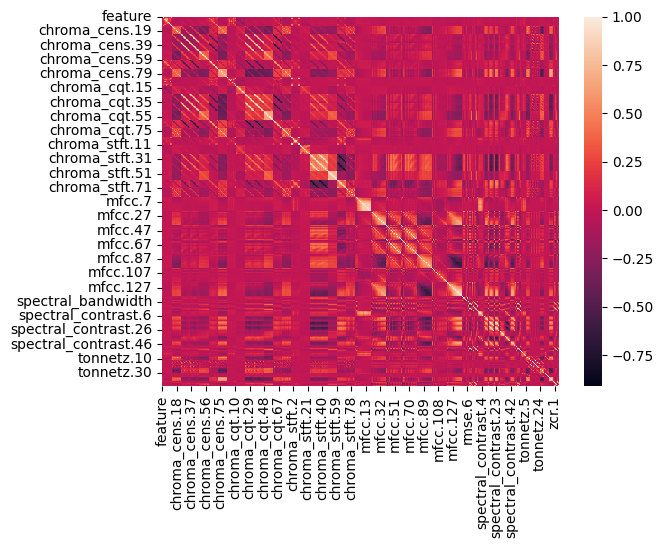

In [ ]:
x=df.select_dtypes(include="number").corr()
sns.heatmap(x)

## **distribution of certain features' max values**
- detect skewness, outliers, and distribution spread.



In [32]:
selected_features = ['rmse.1', 'spectral_centroid.1', 'spectral_bandwidth.1']


In [34]:
for feature in selected_features:
  f=px.histogram(df, x=feature, nbins=50, title=f'Distribution of {feature}')
  f.show()

Output hidden; open in https://colab.research.google.com to view.

## **boxplots for the selected festures to detect outliers**

In [35]:
for feature in selected_features:
    fig = px.box(df, y=feature, title=f'Boxplot of {feature}')
    fig.show()

Output hidden; open in https://colab.research.google.com to view.

## **pairwise scatterplots**

In [39]:
sample_df = df.sample(1000, random_state=42)
fig = px.scatter_matrix(sample_df, dimensions=selected_features,
                        title='Pairplot of Selected Features (Sample of 1000)')
fig.update_traces(diagonal_visible=False)
fig.show()